In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install wordcloud

In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import numpy as np # for working with arrays and carrying out mathematical operations. Pandas is built on Numpy
import re # In-built regular expressions library
import string # Inbuilt string library
import nltk


# WordCloud - Python linrary for creating image wordclouds
from wordcloud import WordCloud



In [ ]:
apple = pd.DataFrame(pd.read_excel("/content/drive/MyDrive/Text_Analytics/Assignment 3/Apple_Tweets.xlsx"))

In [ ]:
Apple = apple[['State','Message','Sentiment']]

In [ ]:
Apple.drop_duplicates(inplace = True)

In [ ]:
Apple.info

<bound method DataFrame.info of             State                                            Message Sentiment
0       Telangana  Apple Music has definitely raised the stakes w...   NEUTRAL
1       Karnataka  Apple Acquires AI Music Startup That Can Gener...   NEUTRAL
2       Telangana  Audio(Opens in your favorite platform):\n\nlin...   NEUTRAL
3      Tamil Nadu  @arvindm_19 @arvindm_19 Apple music. I am usin...   NEUTRAL
4      Tamil Nadu  I could feel alot of difference in audio quali...   NEUTRAL
...           ...                                                ...       ...
4258       Kerala  RT @Aravinthvj_24 #Master Album ( in Million )...   NEUTRAL
4262    Telangana  RT @Aravinthvj_24 #Master Album ( in Million )...   NEUTRAL
4264        Delhi  RT @agustranda anyway remember you can stream ...   NEUTRAL
4267  Maharashtra  RT @Aravinthvj_24 #Master Album ( in Million )...   NEUTRAL
4268  Maharashtra  RT @KunalLol My next track 'Gumshuda' "AUDIO" ...   NEUTRAL

[3120 rows x 3 colu

In [ ]:
Apple[['State']] = Apple[['State']].fillna('UnIdentified')

In [ ]:
Apple.isna().sum()

State        0
Message      0
Sentiment    0
dtype: int64

In [ ]:
Apple.head(10)

,State,Message,Sentiment
0,Telangana,Apple Music has definitely raised the stakes w...,NEUTRAL
1,Karnataka,Apple Acquires AI Music Startup That Can Gener...,NEUTRAL
2,Telangana,Audio(Opens in your favorite platform):\n\nlin...,NEUTRAL
3,Tamil Nadu,@arvindm_19 @arvindm_19 Apple music. I am usin...,NEUTRAL
4,Tamil Nadu,I could feel alot of difference in audio quali...,NEUTRAL
5,Maharashtra,#Loot\nBoAt BassHeads 100 In-Ear Headphones Wi...,NEUTRAL
6,Tamil Nadu,Spotify is one mokka app. It is good if you ca...,POSITIVE
7,Telangana,Audio Plug-in Software Application Market 2022...,NEUTRAL
8,Bihar,Why don't you extend the features to add vario...,POSITIVE
9,UnIdentified,RT @JayKayOST Shazam goal for Stay Alive was 2...,NEUTRAL


## **Distribution of tweets across India**

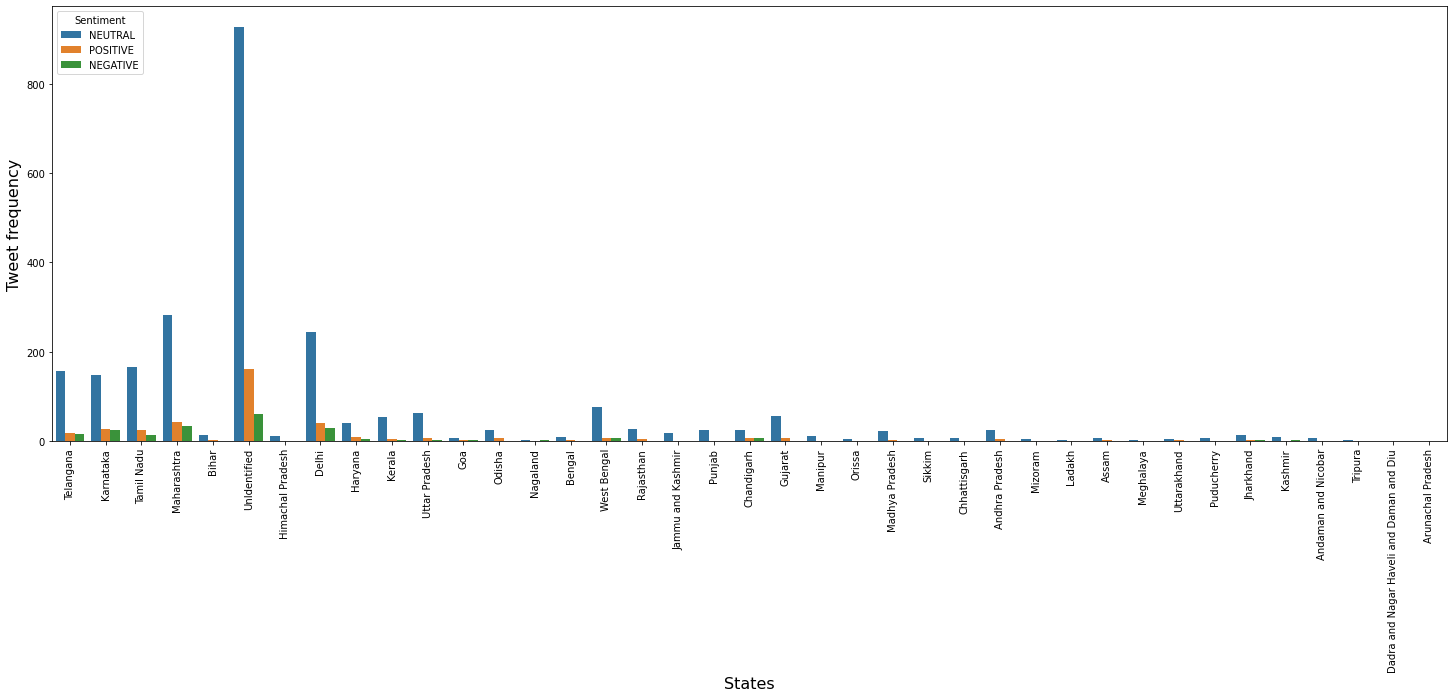

In [ ]:
plt.figure(figsize=(25, 8))
ax = sns.countplot(x='State', hue='Sentiment', data=Apple)
plt.xticks(rotation=90)
plt.ylabel('Tweet frequency', fontsize=16)
plt.xlabel('States', fontsize=16)
plt.show()

## **Cleansing of Tweets**

In [ ]:
Apple.Message[2]

'Audio(Opens in your favorite platform):\n\nlink.chtbl.com/tgv\n\nYouTube:\nyoutube.com/watch?v=OXdqXB…\n\n#tgv is now available on Podbean, Amazon Music, JioSaavn, Spotify, Gaana, Apple, Google podcasts and wherever you find podcasts!'

In [ ]:
from bs4 import BeautifulSoup
Apple["Cleaned_tweet"] = Apple['Message']
Apple['Cleaned_tweet'].apply(lambda Cleaned_tweet: BeautifulSoup(Cleaned_tweet, 'html.parser').get_text())
Apple["Cleaned_tweet"] = Apple.Cleaned_tweet.str.lower()
Apple.head(10)

,State,Message,Sentiment,Cleaned_tweet
0,Telangana,Apple Music has definitely raised the stakes w...,NEUTRAL,apple music has definitely raised the stakes w...
1,Karnataka,Apple Acquires AI Music Startup That Can Gener...,NEUTRAL,apple acquires ai music startup that can gener...
2,Telangana,Audio(Opens in your favorite platform):\n\nlin...,NEUTRAL,audio(opens in your favorite platform):\n\nlin...
3,Tamil Nadu,@arvindm_19 @arvindm_19 Apple music. I am usin...,NEUTRAL,@arvindm_19 @arvindm_19 apple music. i am usin...
4,Tamil Nadu,I could feel alot of difference in audio quali...,NEUTRAL,i could feel alot of difference in audio quali...
5,Maharashtra,#Loot\nBoAt BassHeads 100 In-Ear Headphones Wi...,NEUTRAL,#loot\nboat bassheads 100 in-ear headphones wi...
6,Tamil Nadu,Spotify is one mokka app. It is good if you ca...,POSITIVE,spotify is one mokka app. it is good if you ca...
7,Telangana,Audio Plug-in Software Application Market 2022...,NEUTRAL,audio plug-in software application market 2022...
8,Bihar,Why don't you extend the features to add vario...,POSITIVE,why don't you extend the features to add vario...
9,UnIdentified,RT @JayKayOST Shazam goal for Stay Alive was 2...,NEUTRAL,rt @jaykayost shazam goal for stay alive was 2...


**Remove @ mentions and hyperlinks**

In [ ]:
def clean_raw_data(raw):

    # Remove hyperlinks and markup - <q class="IRsGHoPm">
    result = re.sub("<[a][^>]*>(.+?)</[a]>", 'Link.', raw)
    result = re.sub('&gt;', "", result)
    result = re.sub('&#x27;', "'", result)
    result = re.sub('&quot;', '"', result)
    result = re.sub('&#x2F;', ' ', result)
    result = re.sub('<p>', ' ', result)
    result = re.sub('</i>', '', result)
    result = re.sub('&#62;', '', result)
    result = re.sub('<i>', ' ', result)
    result = re.sub("\n", '', result)
    result = re.sub("<>", '', result)
    result = re.sub("_", '', result)
    result = re.sub("bit", '', result)
    result = re.sub("ly", '', result)
    result = re.sub('/', '', result)
    result = re.sub('rt', '', result)
    result = re.sub('pic.twitter.comblnahawy', '', result)
    
    return result

In [ ]:
Apple["Cleaned_tweet"] = Apple.Cleaned_tweet.apply(clean_raw_data)

In [ ]:
from nltk.corpus import stopwords,words
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('words')

# Defining my NLTK stop words and my user-defined stop words
stop_words = []
stop_words = list(set(stopwords.words('english')))
user_stop_words = ['apple music','applemusic']

alphabets = list(string.ascii_lowercase)
stop_words = stop_words + user_stop_words + alphabets
word_list = words.words()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
import re

def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [ ]:
# Function to remove punctuations, links, and stop words
def preprocessTweets(tweet):
    tweet = tweet.lower()  #has to be in place
    # Remove urls
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#|\d+', '', tweet)
    # Remove stopwords
    tweet_tokens = word_tokenize(tweet)  # convert string to tokens
    filtered_words = [w for w in tweet_tokens if w not in stop_words]
    filtered_words = [w for w in filtered_words if w in word_list]

    # Remove punctuations
    unpunctuated_words = [char for char in filtered_words if char not in string.punctuation]
    unpunctuated_words = ' '.join(unpunctuated_words)

    return "".join(unpunctuated_words)  # join words with a space in between them


# function to obtain adjectives from tweets
def getAdjectives(tweet):
    tweet = word_tokenize(tweet)  # convert string to tokens
    tweet = [word for (word, tag) in pos_tag(tweet)
             if tag == "JJ"]  # pos_tag module in NLTK library
    return " ".join(tweet)  # join words with a space in between them

In [ ]:
import nltk
nltk.download('punkt')
Apple["Cleaned_tweet"] =  Apple["Cleaned_tweet"].apply(preprocessTweets)
Apple["Cleaned_tweet"] =  Apple["Cleaned_tweet"].apply(remove_emoji)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
print(Apple.Cleaned_tweet[3])
print(Apple.Message[3])

apple music audio quality
@arvindm_19 @arvindm_19 Apple music. I am using loseless audio quality.


In [ ]:
import nltk
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')
Apple["Tweets_Adjectives"] = Apple['Cleaned_tweet'].apply(getAdjectives)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer

# function to return words to their base form using Lemmatizer
def preprocessTweetsSentiments(tweet):
    tweet_tokens = word_tokenize(tweet)
    lemmatizer = WordNetLemmatizer() # instatiate an object WordNetLemmatizer Class
    lemma_words = [lemmatizer.lemmatize(w) for w in tweet_tokens]
    return " ".join(lemma_words)

In [ ]:
# Extract all tweets into one long string with each word separate with a "space"
tweets_long_string = Apple['Tweets_Adjectives'].tolist()
tweets_long_string = " ".join(tweets_long_string)

In [ ]:
neg_tweets = Apple[Apple.Sentiment == 'NEGATIVE']
neg_tweets["Tweets_Adjectives"] =  neg_tweets["Tweets_Adjectives"].apply(preprocessTweets)
neg_tweets["Tweets_Adjectives"] =  neg_tweets["Tweets_Adjectives"].apply(remove_emoji)
neg_tweets["Tweets_Adjectives"] =  neg_tweets["Tweets_Adjectives"].apply(clean_raw_data)
neg_string = []
for t in neg_tweets.Tweets_Adjectives:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

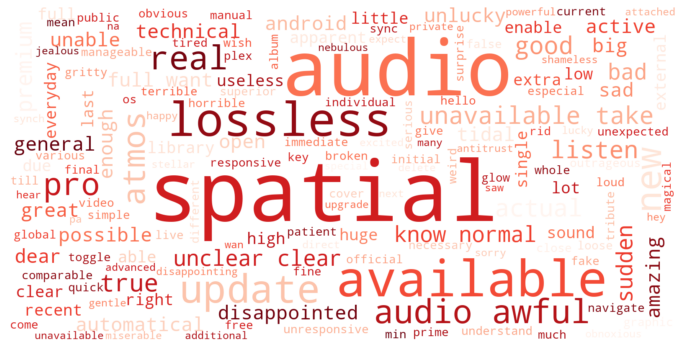

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200,
                      colormap='Reds',background_color ='white').generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
pos_tweets = Apple[Apple.Sentiment == 'POSITIVE']
pos_tweets["Tweets_Adjectives"] =  pos_tweets["Tweets_Adjectives"].apply(preprocessTweets)
pos_tweets["Tweets_Adjectives"] =  pos_tweets["Tweets_Adjectives"].apply(remove_emoji)
pos_tweets["Tweets_Adjectives"] =  pos_tweets["Tweets_Adjectives"].apply(clean_raw_data)

pos_string = []
for t in pos_tweets.Tweets_Adjectives:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')

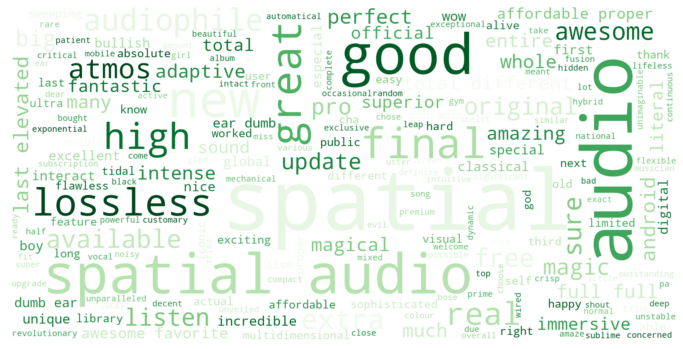

In [ ]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap='Greens',background_color ='white').generate(pos_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
neu_tweets = Apple[Apple.Sentiment == 'NEUTRAL']
neu_tweets["Tweets_Adjectives"] =  neu_tweets["Tweets_Adjectives"].apply(preprocessTweets)
neu_tweets["Tweets_Adjectives"] =  neu_tweets["Tweets_Adjectives"].apply(remove_emoji)
neu_tweets["Tweets_Adjectives"] =  neu_tweets["Tweets_Adjectives"].apply(clean_raw_data)
neu_string = []
for t in neu_tweets.Cleaned_tweet:
    neu_string.append(t)
neu_string = pd.Series(neu_string).str.cat(sep=' ')

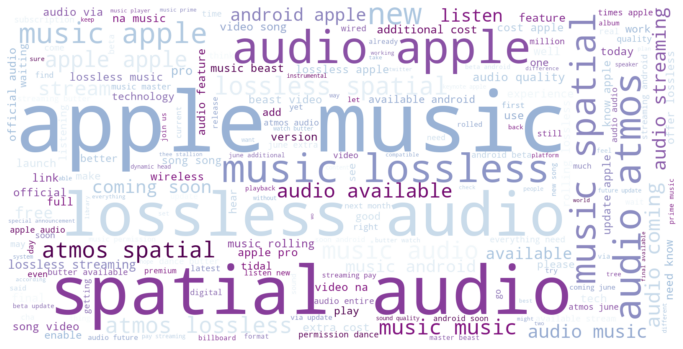

In [ ]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap='BuPu',background_color ='white').generate(neu_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## **Creating n - grams for analysis**

In [ ]:
# natural language processing: n-gram ranking
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
# add appropriate words that will be ignored in the analysis
ADDITIONAL_STOPWORDS = ['apple']

import matplotlib.pyplot as plt

In [ ]:
def basic_clean(text):
  """
  A simple function to clean up the data. All the words that
  are not designated as a stop word is then lemmatized after
  encoding and basic regex parsing are performed.
  """
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

**Positive Tweets**

In [ ]:
Pos_words = basic_clean(''.join(str(pos_tweets['Cleaned_tweet'].tolist())))

In [ ]:
(pd.Series(nltk.ngrams(Pos_words, 2)).value_counts())[:10]

(spatial, audio)       164
(lossless, audio)       97
(audio, music)          48
(music, lossless)       44
(music, spatial)        35
(audio, quality)        29
(audio, lossless)       28
(music, music)          28
(audio, atmos)          25
(lossless, spatial)     14
dtype: int64

In [ ]:
(pd.Series(nltk.ngrams(Pos_words, 3)).value_counts())[:20]

(music, spatial, audio)         34
(music, lossless, audio)        28
(spatial, audio, lossless)      25
(spatial, audio, music)         24
(spatial, audio, atmos)         17
(audio, lossless, streaming)    14
(lossless, spatial, audio)      13
(budget, audiophile, kit)       12
(best, budget, audiophile)      12
(audiophile, kit, music)        12
(enjoy, spatial, audio)         12
(kit, music, lossless)          12
(lossless, audio, music)        12
(attention, android, enjoy)     10
(lossless, streaming, music)    10
(music, lossless, spatial)      10
(android, enjoy, spatial)       10
(lossless, audio, extra)         8
(atmos, spatial, audio)          7
(every, category, ear)           7
dtype: int64

In [ ]:
pos_bigrams_series = (pd.Series(nltk.ngrams(Pos_words, 2)).value_counts())[:12]
pos_trigrams_series = (pd.Series(nltk.ngrams(Pos_words, 3)).value_counts())[:12]

Text(0.5, 0, '# of Occurances')

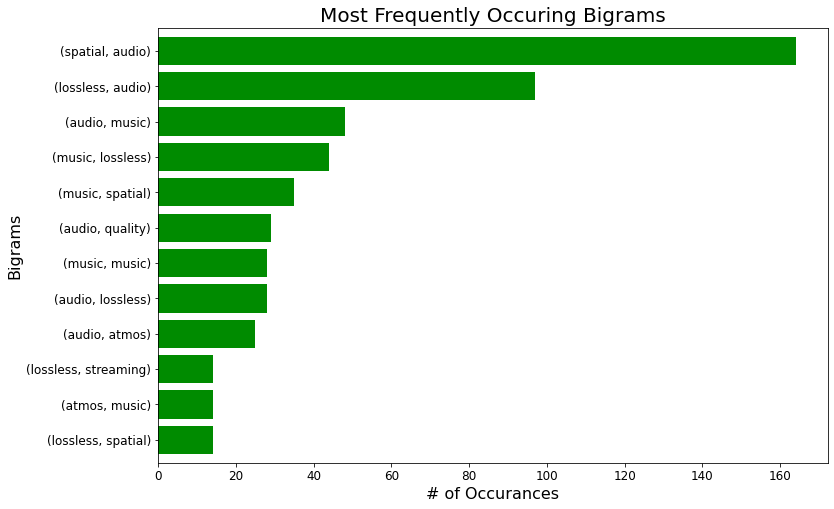

In [ ]:
pos_bigrams_series.sort_values().plot.barh(color='#008B00', width=.8, figsize=(12, 8),fontsize=12)
plt.title('Most Frequently Occuring Bigrams',fontsize=20)
plt.ylabel('Bigrams',fontsize=16)
plt.xlabel('# of Occurances',fontsize=16)

Text(0.5, 0, '# of Occurances')

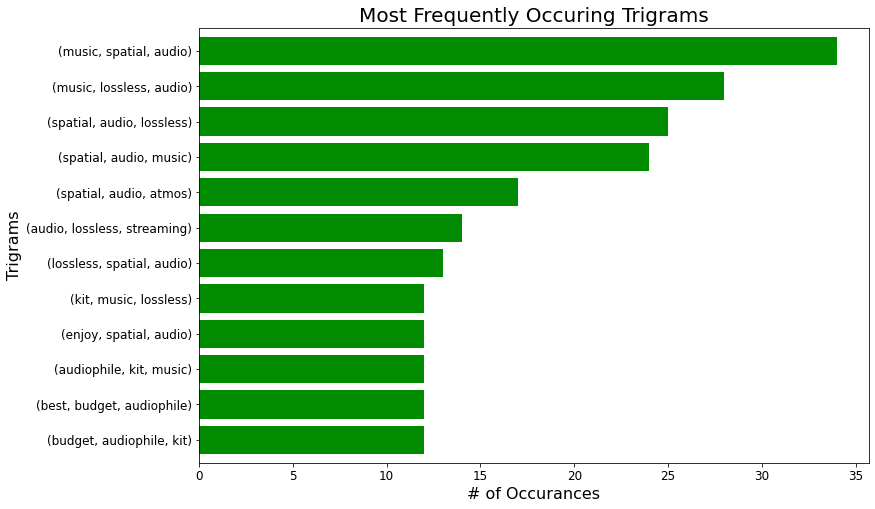

In [ ]:
pos_trigrams_series.sort_values().plot.barh(color='#008B00', width=.8, figsize=(12, 8),fontsize=12)
plt.title('Most Frequently Occuring Trigrams',fontsize=20)
plt.ylabel('Trigrams',fontsize=16)
plt.xlabel('# of Occurances',fontsize=16)

**Negative Tweets**

In [ ]:
Neg_words = basic_clean(''.join(str(neg_tweets['Cleaned_tweet'].tolist())))

In [ ]:
(pd.Series(nltk.ngrams(Neg_words, 2)).value_counts())[:10]

(spatial, audio)     91
(lossless, audio)    71
(audio, music)       30
(music, spatial)     21
(music, lossless)    19
(audio, quality)     17
(audio, atmos)       16
(audio, lossless)    14
(quality, music)     10
(audio, still)       10
dtype: int64

In [ ]:
(pd.Series(nltk.ngrams(Neg_words, 3)).value_counts())[:10]

(music, spatial, audio)       21
(spatial, audio, music)       17
(music, lossless, audio)      16
(spatial, audio, lossless)    13
(spatial, audio, atmos)       10
(without, spending, awful)     9
(enjoy, music, lossless)       9
(lossless, audio, format)      9
(audio, format, without)       9
(awful, lot, money)            9
dtype: int64

In [ ]:
neg_bigrams_series = (pd.Series(nltk.ngrams(Neg_words, 2)).value_counts())[:12]
neg_trigrams_series = (pd.Series(nltk.ngrams(Neg_words, 3)).value_counts())[:12]

Text(0.5, 0, '# of Occurances')

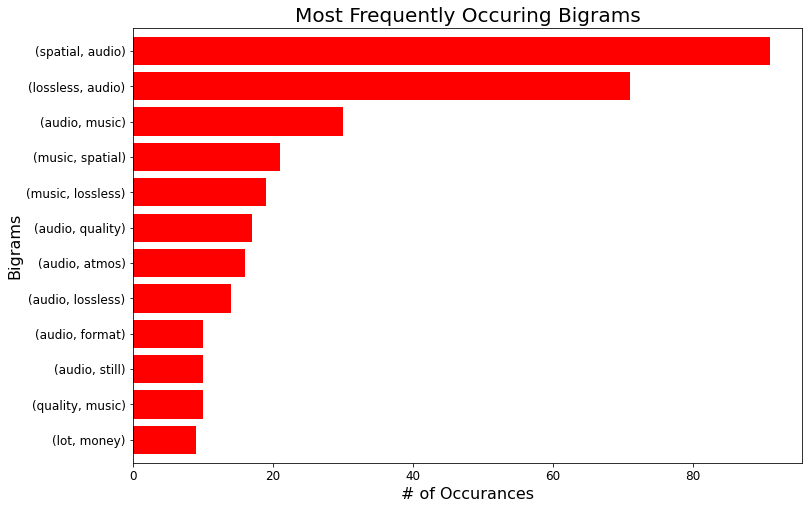

In [ ]:
neg_bigrams_series.sort_values().plot.barh(color='#FF0000', width=.8, figsize=(12, 8),fontsize=12)
plt.title('Most Frequently Occuring Bigrams',fontsize=20)
plt.ylabel('Bigrams',fontsize=16)
plt.xlabel('# of Occurances',fontsize=16)

Text(0.5, 0, '# of Occurances')

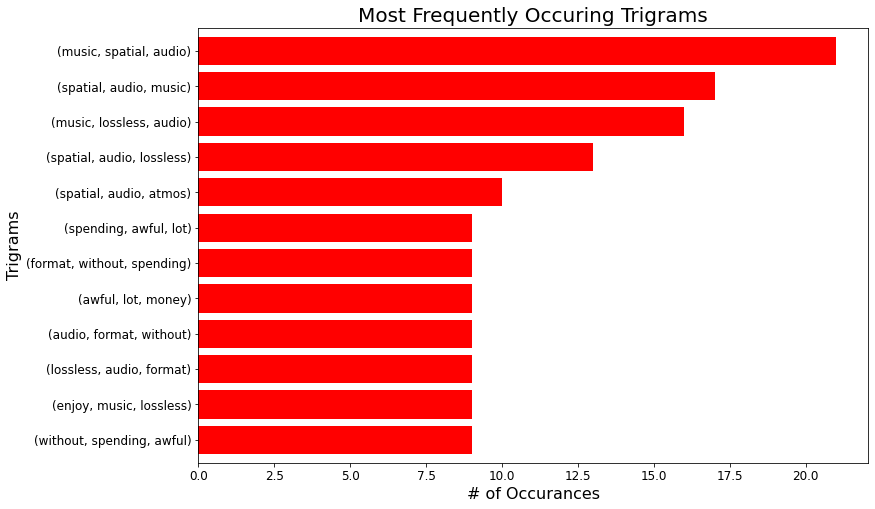

In [ ]:
neg_trigrams_series.sort_values().plot.barh(color='#FF0000', width=.8, figsize=(12, 8),fontsize=12)
plt.title('Most Frequently Occuring Trigrams',fontsize=20)
plt.ylabel('Trigrams',fontsize=16)
plt.xlabel('# of Occurances',fontsize=16)

**Neutral Tweets**

In [ ]:
Neu_words = basic_clean(''.join(str(neu_tweets['Cleaned_tweet'].tolist())))

In [ ]:
(pd.Series(nltk.ngrams(Neu_words, 2)).value_counts())[:10]

(spatial, audio)       1105
(lossless, audio)       888
(audio, music)          422
(music, lossless)       334
(audio, atmos)          322
(music, spatial)        274
(music, music)          213
(audio, lossless)       207
(lossless, spatial)     135
(music, audio)          125
dtype: int64

In [ ]:
(pd.Series(nltk.ngrams(Neu_words, 3)).value_counts())[:10]

(music, spatial, audio)       261
(spatial, audio, atmos)       219
(music, lossless, audio)      210
(spatial, audio, lossless)    180
(spatial, audio, music)       166
(lossless, audio, music)      138
(lossless, spatial, audio)    132
(atmos, spatial, audio)       101
(audio, spatial, audio)        99
(lossless, audio, atmos)       97
dtype: int64

In [ ]:
neu_bigrams_series = (pd.Series(nltk.ngrams(Neu_words, 2)).value_counts())[:12]
neu_trigrams_series = (pd.Series(nltk.ngrams(Neu_words, 3)).value_counts())[:12]

Text(0.5, 0, '# of Occurances')

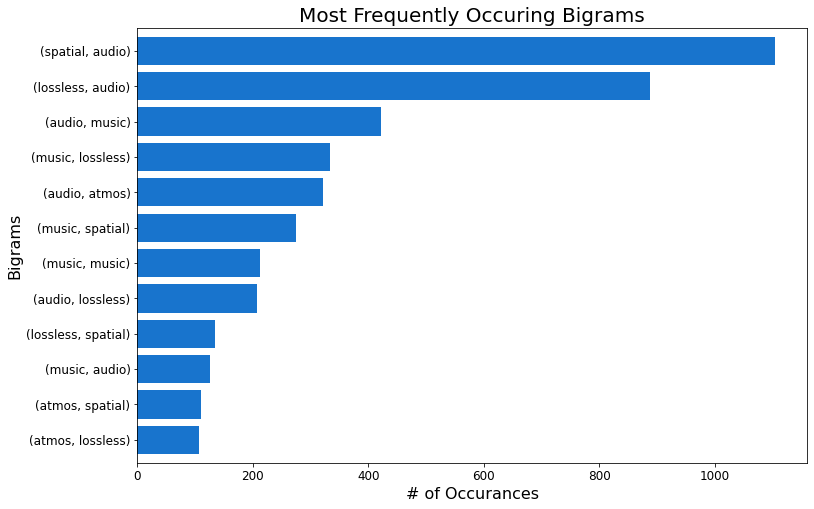

In [ ]:
neu_bigrams_series.sort_values().plot.barh(color='#1874CD', width=.8, figsize=(12, 8),fontsize=12)
plt.title('Most Frequently Occuring Bigrams',fontsize=20)
plt.ylabel('Bigrams',fontsize=16)
plt.xlabel('# of Occurances',fontsize=16)

Text(0.5, 0, '# of Occurances')

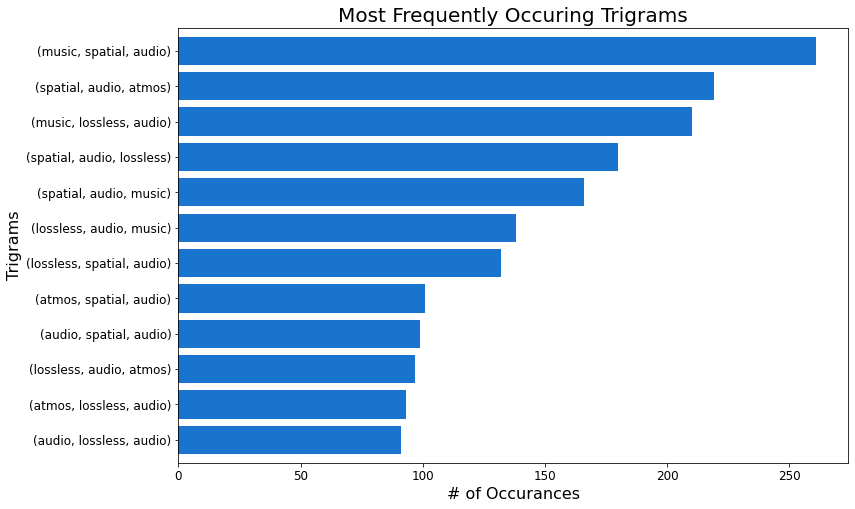

In [ ]:
neu_trigrams_series.sort_values().plot.barh(color='#1874CD', width=.8, figsize=(12, 8),fontsize=12)
plt.title('Most Frequently Occuring Trigrams',fontsize=20)
plt.ylabel('Trigrams',fontsize=16)
plt.xlabel('# of Occurances',fontsize=16)

# **Sentiment Analysis**

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

Apple["POS tagged"] = Apple['Cleaned_tweet'].apply(token_stop_pos)
Apple.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,State,Message,Sentiment,Cleaned_tweet,Tweets_Adjectives,POS tagged,Lemmatised
0,Telangana,Apple Music has definitely raised the stakes w...,NEUTRAL,apple music definite raised lossless audio alw...,lossless personal,"[(apple, n), (music, n), (definite, n), (raise...",apple music definite raise lossless audio al...
1,Karnataka,Apple Acquires AI Music Startup That Can Gener...,NEUTRAL,apple ai music staup generate dynamic music,dynamic,"[(apple, n), (ai, v), (music, n), (staup, n), ...",apple ai music staup generate dynamic music
2,Telangana,Audio(Opens in your favorite platform):\n\nlin...,NEUTRAL,audio favorite platform available music apple ...,audio favorite available,"[(audio, a), (favorite, a), (platform, n), (av...",audio favorite platform available music appl...
3,Tamil Nadu,@arvindm_19 @arvindm_19 Apple music. I am usin...,NEUTRAL,apple music audio quality,,"[(apple, n), (music, n), (audio, n), (quality,...",apple music audio quality
4,Tamil Nadu,I could feel alot of difference in audio quali...,NEUTRAL,could feel difference audio quality apple,audio,"[(could, None), (feel, v), (difference, n), (a...",could feel difference audio quality apple


In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
      if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
      else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

Apple["Lemmatised"] = Apple['POS tagged'].apply(lemmatize)
Apple.head()

,State,Message,Sentiment,Cleaned_tweet,Tweets_Adjectives,POS tagged,Lemmatised
0,Telangana,Apple Music has definitely raised the stakes w...,NEUTRAL,apple music definite raised lossless audio alw...,lossless personal,"[(apple, n), (music, n), (definite, n), (raise...",apple music definite raise lossless audio al...
1,Karnataka,Apple Acquires AI Music Startup That Can Gener...,NEUTRAL,apple ai music staup generate dynamic music,dynamic,"[(apple, n), (ai, v), (music, n), (staup, n), ...",apple ai music staup generate dynamic music
2,Telangana,Audio(Opens in your favorite platform):\n\nlin...,NEUTRAL,audio favorite platform available music apple ...,audio favorite available,"[(audio, a), (favorite, a), (platform, n), (av...",audio favorite platform available music appl...
3,Tamil Nadu,@arvindm_19 @arvindm_19 Apple music. I am usin...,NEUTRAL,apple music audio quality,,"[(apple, n), (music, n), (audio, n), (quality,...",apple music audio quality
4,Tamil Nadu,I could feel alot of difference in audio quali...,NEUTRAL,could feel difference audio quality apple,audio,"[(could, None), (feel, v), (difference, n), (a...",could feel difference audio quality apple


## **Text blob**

In [ ]:
from textblob import TextBlob
# function to calculate subjectivity
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity
    # function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [ ]:
apple_data = pd.DataFrame(Apple[['Cleaned_tweet', 'Lemmatised']])

In [ ]:
apple_data["Polarity"] = apple_data['Lemmatised'].apply(getPolarity) 
apple_data["Analysis"] = apple_data['Polarity'].apply(analysis)
apple_data.head()

,Cleaned_tweet,Lemmatised,Polarity,Analysis
0,apple music definite raised lossless audio alw...,apple music definite raise lossless audio al...,0.00,Neutral
1,apple ai music staup generate dynamic music,apple ai music staup generate dynamic music,0.00,Neutral
2,audio favorite platform available music apple ...,audio favorite platform available music appl...,0.45,Positive
3,apple music audio quality,apple music audio quality,0.00,Neutral
4,could feel difference audio quality apple,could feel difference audio quality apple,0.00,Neutral


In [ ]:
Textblob_counts = apple_data.Analysis.value_counts()
Textblob_counts

Neutral     1622
Positive    1294
Negative     204
Name: Analysis, dtype: int64

## **VADER**

In [ ]:
pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']
apple_data["Vader Sentiment"] = apple_data['Lemmatised'].apply(vadersentimentanalysis)
# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'
apple_data["Vader Analysis"] = apple_data['Vader Sentiment'].apply(vader_analysis)
apple_data.head()

,Cleaned_tweet,Lemmatised,Polarity,Analysis,Vader Sentiment,Vader Analysis
0,apple music definite raised lossless audio alw...,apple music definite raise lossless audio al...,0.00,Neutral,0.4939,Neutral
1,apple ai music staup generate dynamic music,apple ai music staup generate dynamic music,0.00,Neutral,0.3818,Neutral
2,audio favorite platform available music apple ...,audio favorite platform available music appl...,0.45,Positive,0.4588,Neutral
3,apple music audio quality,apple music audio quality,0.00,Neutral,0.0000,Neutral
4,could feel difference audio quality apple,could feel difference audio quality apple,0.00,Neutral,0.0000,Neutral


In [ ]:
vader_counts = apple_data['Vader Analysis'].value_counts()
vader_counts

Neutral     2578
Positive     509
Negative      33
Name: Vader Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7f59b27dcc90>,
 [Text(-0.940211423225164, 0.5709662683879948, 'Neutral'),
  Text(0.9207235719464275, -0.6018871190366278, 'Positive'),
  Text(1.3492547767356182, -0.04485027821672159, 'Negative')],
 [Text(-0.5128425944864531, 0.3114361463934517, '82.6%'),
  Text(0.5022128574253241, -0.32830206492906966, '16.3%'),
  Text(0.8495307853520558, -0.028239064062380262, '1.1%')])

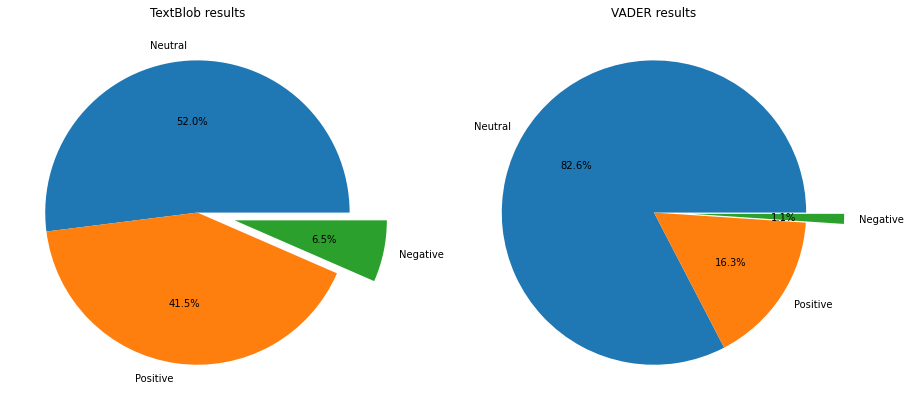

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title("TextBlob results")
plt.pie(Textblob_counts.values, labels = Textblob_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,2,2)
plt.title("VADER results")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)